# The K-Nearest Neighbors Algorithm
The following data is from the Capital bikeshare system in Washington, DC. It contains the number of rental bikes that were rented out each day in 2011 and 2012 and also contains information such as whether it was a working day or holiday and even the temperature, windspeed, humidity, and more. I will be using this data set to train the KNN algorithm and see if it can determine if it was a good or bad day for the company in terms of the percentage of bikes that were rented out.

The data comes from [here](archive.ics.uci.edu/dataset/275/bike+sharing+dataset)

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [28]:
day = pd.read_csv('day.csv')
day

,day,season,year,month,holiday,weekday,workingday,weather situation,temp,actual temp,humidity,windspeed,bikes rented
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


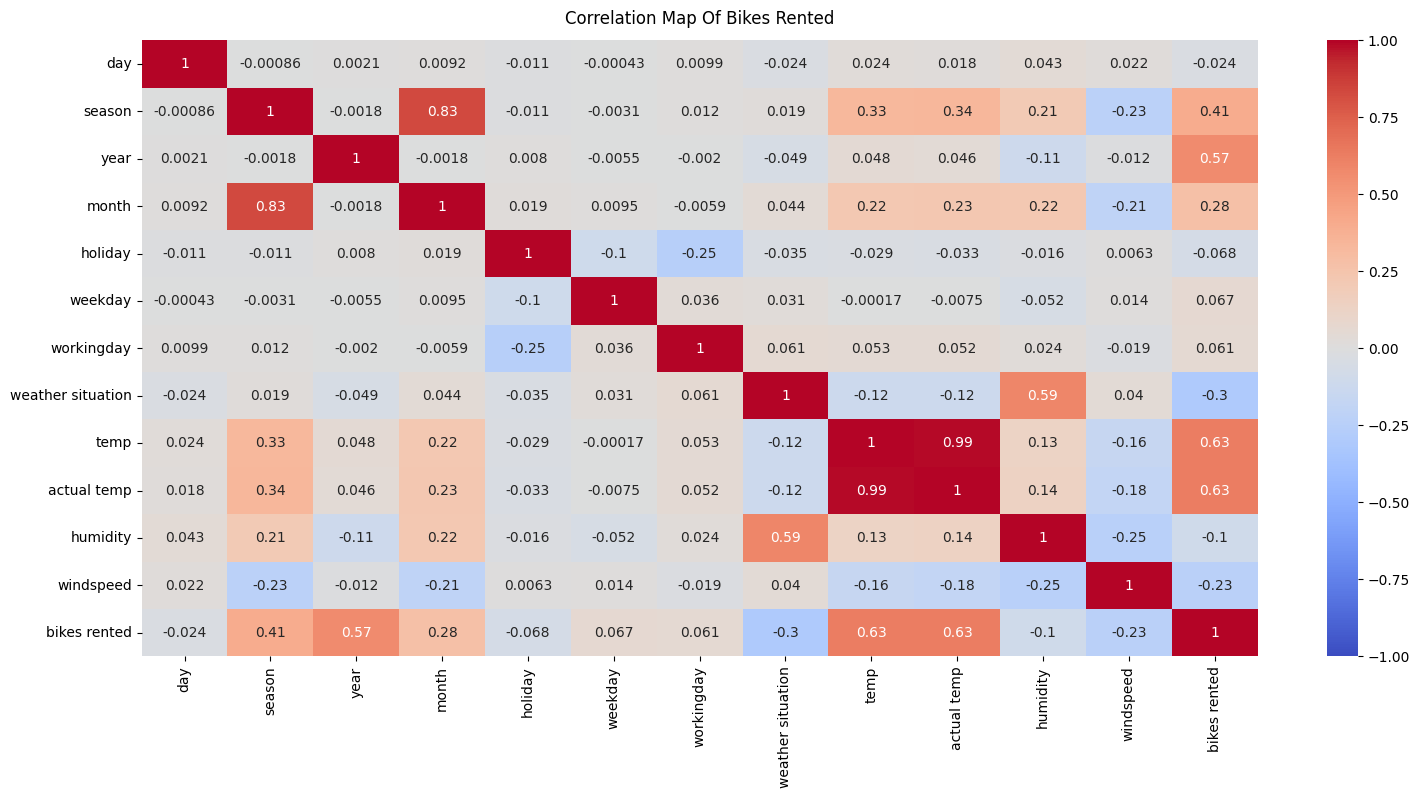

In [29]:
plt.figure(figsize=(18, 8))
sns.heatmap(day.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Map Of Bikes Rented', fontdict={'fontsize':12}, pad=12);

I created this heatmap to determine which characteristics of the day are correlated with bikes rented.

I will use temperature and windspeed as they are more strongly correlated with bikes rented. They are also not very dependent on each other.

In [30]:
data = day[['temp', 'windspeed', 'bikes rented']] # isolating chosen characteristics and bikes rented columns
data

,temp,windspeed,bikes rented
0,0.344167,0.160446,985
1,0.363478,0.248539,801
2,0.196364,0.248309,1349
3,0.200000,0.160296,1562
4,0.226957,0.186900,1600
...,...,...,...
726,0.254167,0.350133,2114
727,0.253333,0.155471,3095
728,0.253333,0.124383,1341
729,0.255833,0.350754,1796


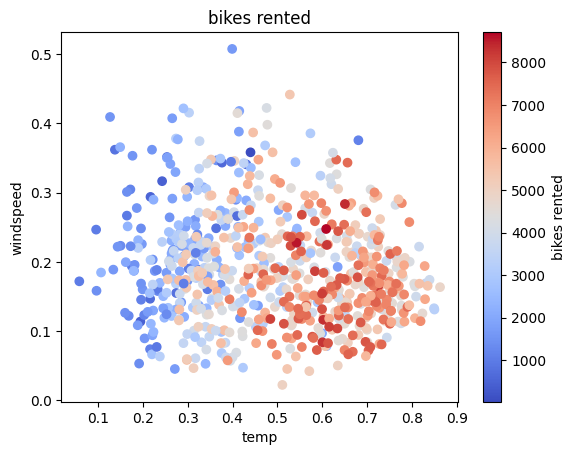

In [31]:
plt.scatter(data['temp'], data['windspeed'], c = data['bikes rented'], cmap='coolwarm')
plt.xlabel('temp')
plt.ylabel('windspeed')
plt.title('bikes rented')
plt.colorbar(label='bikes rented')
plt.show()

Scatterplot mainly is the same as the heatmap in terms of the information provided. Lower temperature and higher temperature = more bikes rented

In [32]:
bikes_rented = np.unique(data['bikes rented'])
bikes_rented

array([  22,  431,  441,  506,  605,  623,  627,  683,  705,  754,  795,
        801,  822,  920,  959,  981,  985,  986, 1000, 1005, 1011, 1013,
       1027, 1096, 1098, 1107, 1115, 1162, 1167, 1204, 1248, 1263, 1301,
       1317, 1321, 1341, 1349, 1360, 1406, 1416, 1421, 1446, 1450, 1461,
       1471, 1472, 1495, 1501, 1510, 1526, 1529, 1530, 1536, 1538, 1543,
       1550, 1562, 1589, 1600, 1605, 1606, 1607, 1623, 1635, 1650, 1683,
       1685, 1693, 1708, 1712, 1746, 1749, 1787, 1795, 1796, 1807, 1812,
       1815, 1817, 1834, 1842, 1851, 1865, 1872, 1891, 1913, 1917, 1927,
       1944, 1951, 1969, 1977, 1985, 1996, 2028, 2034, 2046, 2056, 2077,
       2114, 2115, 2121, 2132, 2133, 2134, 2162, 2169, 2177, 2192, 2209,
       2210, 2227, 2236, 2252, 2277, 2294, 2298, 2302, 2311, 2368, 2376,
       2395, 2402, 2416, 2417, 2423, 2424, 2425, 2429, 2431, 2432, 2455,
       2471, 2475, 2485, 2493, 2496, 2566, 2594, 2633, 2659, 2660, 2689,
       2703, 2710, 2729, 2732, 2739, 2743, 2744, 27

Businesses normally aim for about 70-75% of bikes being rented out. Here I am assuming 8714 bikes are the total amount of bikes they have. The 70-75% number usually depends on the season so to account for that, I will drop that to 60% or 5228 bikes being rented out. If it is 5228 or higher in a day, it will be considered as a "good" day. If lower, then a "bad" day.

In [33]:
bikes_rented = np.unique(data['bikes rented'])
for i in range(696):
  print(len(data[data['bikes rented'] == bikes_rented[i]]))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
2
2
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [34]:
# Use the original numeric column from 'day' for thresholding
data['bikes rented'] = np.where(day['bikes rented'] > 5227, 1, 0)
data['bikes rented'].value_counts()

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_11698/3219229710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bikes rented'] = np.where(day['bikes rented'] > 5227, 1, 0)


bikes rented
0    478
1    253
Name: count, dtype: int64

The 0 means a bad day and 1 means a good day. This tells us there were a lot more bad days than good days.

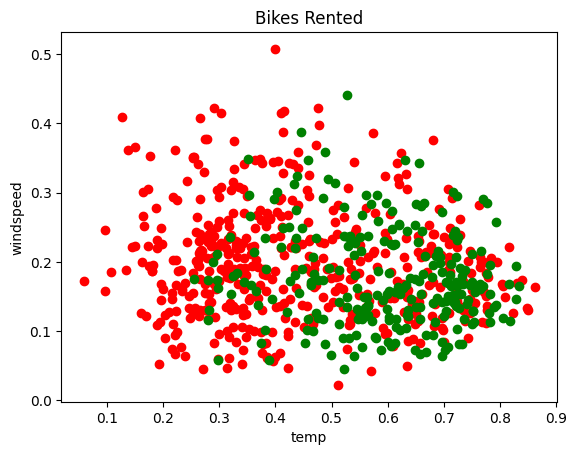

In [35]:
plot_data_1 = data[data['bikes rented'] == 0]
plt.scatter(plot_data_1['temp'], plot_data_1['windspeed'], c='red')

plot_data_2 = data[data['bikes rented'] == 1]
plt.scatter(plot_data_2['temp'], plot_data_2['windspeed'], c='green')

plt.xlabel('temp')
plt.ylabel('windspeed')
plt.title('Bikes Rented')
plt.show()

This scatterplot is very similar to the other one as this one shows good and bad days. The good days in green are again when temperatures are higher and windspeed is lower. However, there are still a lot of red dots around the green clusters whic means the algorithm can have a tough time figuring out a good and bad day.

Now onto training the model.

In [36]:
from sklearn.model_selection import train_test_split
X = data.drop(['bikes rented'], axis = 1).to_numpy()
y = data['bikes rented'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [37]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between the 5th and 15th points is {distance(X_train[5], X_train[15])}")

The distance between the 5th and 15th points is 0.2612945742146209


In [38]:
def k_nearest_neighbors(point, training_features, training_labels, k):
    neighbors = []
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
    neighbors.sort(key=lambda x: x[-1])
    return neighbors[:k]

In [39]:
K = 5
k_nearest_neighbors(X_test[-1], X_train, y_train, K)

[[array([0.390833, 0.263063]), np.int64(0), np.float64(0.0021074059884131956)],
 [array([0.384348, 0.270604]), np.int64(0), np.float64(0.009932601773956294)],
 [array([0.384167, 0.251871]), np.int64(0), np.float64(0.011151942073020317)],
 [array([0.403333, 0.271779]), np.int64(0), np.float64(0.01734601302893546)],
 [array([0.373333, 0.274246]), np.int64(0), np.float64(0.020032641488330963)]]

In [40]:
label_map = {0: "bad", 1: "good"}
label_map[y_test[-1]]

'bad'

In [41]:
def KNN_Predict(point, training_features, training_labels, k, regression=False):
    neighbors = k_nearest_neighbors(point, training_features, training_labels, k)
    if not regression:
        labels = [x[1] for x in neighbors]
        return max(labels, key=labels.count)
    else:
        return sum(x[1] for x in neighbors) / k

In [42]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        if test_labels[i] != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k):
          error = error + 1
    return error/i
     

In [43]:
possible_k = [x for x in range(2, 50, 2)]
error_rate = errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

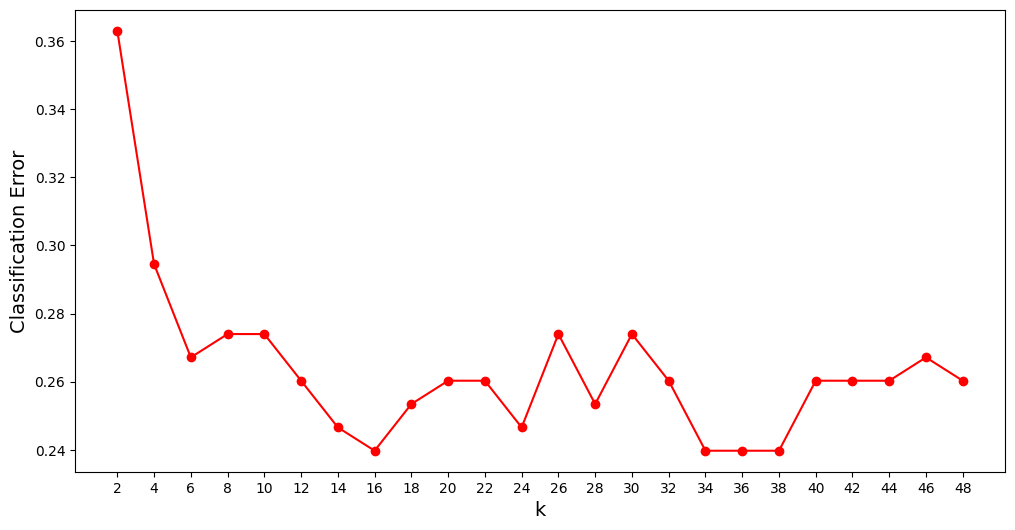

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(possible_k, errors, color = 'red', marker = 'o')
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

After all the training, I now test to see what K values give me the lowest classification error. The graph shows that as K values increase, the classification error decreases and the stagnates. In that graph, it seems like k = 16 has the lowest error (displayed below). So, I will use k = 16 for the KNN algorithm for predictions.

In [45]:
K = 16
classification_error(X_test, y_test, X_train, y_train, K)

0.23972602739726026

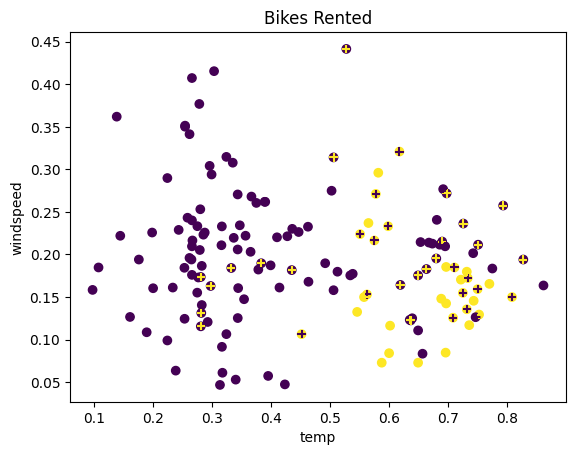

In [46]:
predicted_labels = [KNN_Predict(point, X_train, y_train, 16) for point in X_test]
plt.scatter(X_test[:,0], X_test[:,1], c = predicted_labels)
plt.scatter(X_test[:,0], X_test[:,1], c = y_test, marker = '+')
plt.xlabel('temp')
plt.ylabel('windspeed')
plt.title('Bikes Rented')
plt.show()

This scatterplot shows the KNN algorithm's predictions overlayed with the actual results. If you see a plain dot with no plus, the algorithm got it correct. If there is a visible plus sign, that means the algorithm got it wrong.

Most plus signs show up at high temp and low windspeed which makes sense because I had predicted earlier that it would make mistakes there. Again, this is because a lot of bad days had roughly the same values as good days in that area of the graph.

We can conclude that KNN still does a good job at determining good or bad days for the bike company. However, some of the data can lead to mistakes as many bad days were the same as good days in terms of the characterstics of the day so it may be worth finding out more unique characterstics.